# Árvores de Decisão

In [2]:
#Aluno: Aristofanes Santos de Lira
#Matricula: 152085386

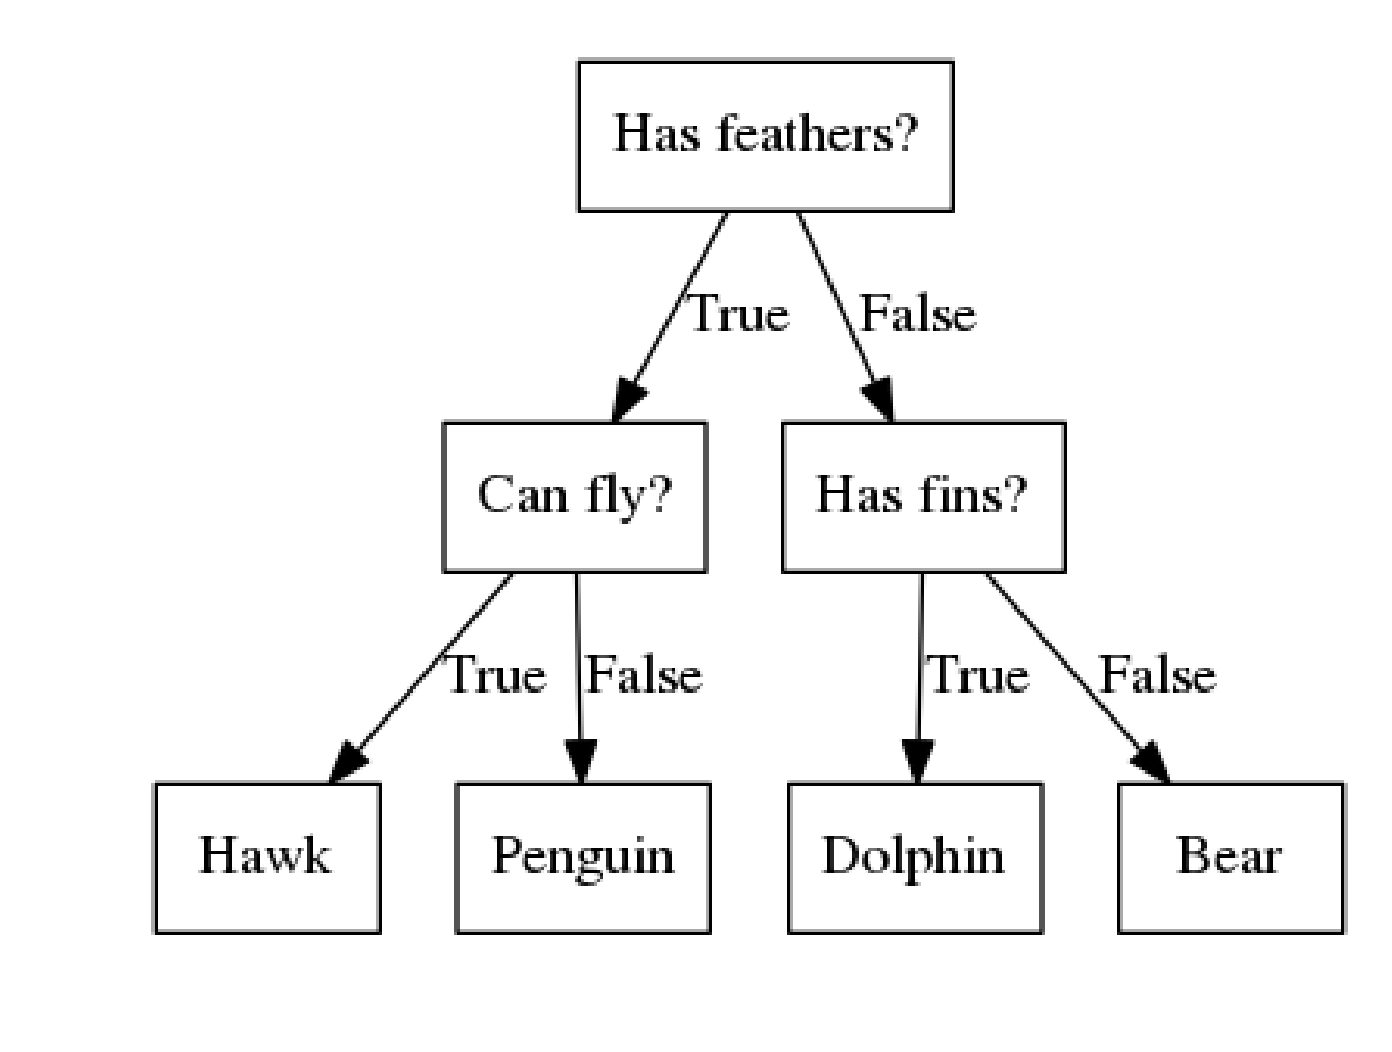

In [9]:
# Exemple de uma árvore de decisão
# feathers = Penas
# frins = Barbatanas
from IPython.display import Image 
Image(filename='ArvoreDeDecisao.png')

In [10]:
# Carregando o dataset sobre Cancer de Mama 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [11]:
print("Tamanhado (shape) do dataset de cancer: {}".format(cancer.data.shape))

Tamanhado (shape) do dataset de cancer: (569, 30)


In [12]:
print("Numero de Exemplos por Classe:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Numero de Exemplos por Classe:
{'malignant': 212, 'benign': 357}


In [26]:
atributos = ['worst radius','worst concave points''worst area''worst fractal dimension''worst symmetry''worst smoothness''symmetry error''worst perimeter''worst compactness''mean concave points']
df2 = df.loc[atributos]
df2.head()

NameError: name 'df' is not defined

In [30]:
atributos = dfi.loc['Atributos']
atributos
atributos = [ ['worst radius','worst concave points''worst area''worst fractal dimension''worst symmetry''worst smoothness''symmetry error''worst perimeter''worst compactness''mean concave points']
df2 = df.loc[atributos]            
df2.head()             

SyntaxError: invalid syntax (<ipython-input-30-bf8759e9a6cc>, line 4)

In [28]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [29]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
X_train[:3]

array([[1.989e+01, 2.026e+01, 1.305e+02, 1.214e+03, 1.037e-01, 1.310e-01,
        1.411e-01, 9.431e-02, 1.802e-01, 6.188e-02, 5.079e-01, 8.737e-01,
        3.654e+00, 5.970e+01, 5.089e-03, 2.303e-02, 3.052e-02, 1.178e-02,
        1.057e-02, 3.391e-03, 2.373e+01, 2.523e+01, 1.605e+02, 1.646e+03,
        1.417e-01, 3.309e-01, 4.185e-01, 1.613e-01, 2.549e-01, 9.136e-02],
       [1.289e+01, 1.312e+01, 8.189e+01, 5.159e+02, 6.955e-02, 3.729e-02,
        2.260e-02, 1.171e-02, 1.337e-01, 5.581e-02, 1.532e-01, 4.690e-01,
        1.115e+00, 1.268e+01, 4.731e-03, 1.345e-02, 1.652e-02, 5.905e-03,
        1.619e-02, 2.081e-03, 1.362e+01, 1.554e+01, 8.740e+01, 5.770e+02,
        9.616e-02, 1.147e-01, 1.186e-01, 5.366e-02, 2.309e-01, 6.915e-02],
       [1.714e+01, 1.640e+01, 1.160e+02, 9.127e+02, 1.186e-01, 2.276e-01,
        2.229e-01, 1.401e-01, 3.040e-01, 7.413e-02, 1.046e+00, 9.760e-01,
        7.276e+00, 1.114e+02, 8.029e-03, 3.799e-02, 3.732e-02, 2.397e-02,
        2.308e-02, 7.444e-03, 2.225e

In [15]:
cancer.target[:3]

array([0, 0, 0])

In [16]:
# aplicar o algoritmo de arvores de decisao
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [17]:
# Analisando a árvore de decisao

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [20]:
# instalar o graphviz: https://anaconda.org/anaconda/graphviz
import graphviz
from IPython.display import set_matplotlib_formats, display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ModuleNotFoundError: No module named 'graphviz'

In [21]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [1]:
# mostrar os atributos mais relavantes (features)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(12,10))
    print ("Atributos mais relavantes")
    plt.show()
    

plot_feature_importances_cancer(tree)


NameError: name 'tree' is not defined